# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Wenkang Wei"
COLLABORATORS = "Wenkang Wei"

# CPSC4300/6300-001 Problem Set #4

# Part B. Classification Models Performance Evaluation

This part continues Part A. We make it a separate notebook so that we can keep the code clean.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")

# 1. Classification Models Comparison

During this semester, you have learned multiple classification methods. One question you may wonder is how each method performs for a given data set. With the work you have just compeleted in part A, this task looks like a piece of cake. Now, using the framework we have used in this assignment, conduct some experiments to compare the performance of the following classification models:

1. RandomForestClassifier
2. SVC
3. GaussianNB
4. KNeighborsClassifier
5. LogisticRegression
6. DecisionTreeClassifier
7. MLPClassifier
8. AdaBoostClassifier

__Question 1.1__ Which one of the following statements is most accurate? (3 Points)

```
A. Given a dataset, the train and test set splits of the dataset will not affect the performance of the classification model.
B. When compare the performance of several models, a best practice is to run each model multiple times with different train and test splits and to report both the means and variances of all models for a fair comparison.
C. When solve a classification problem, more complex models like AdaBoost or Random Forest always perform better than a simplier model like Logistc Regression.
D. A classification model that achives 100% test accuracy at one run is the best model for the problem under standy.
```

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()
answer = 'B'
answer

'B'

## Answer to Q1.1:  B

__Question 1.2__ Write some Python code to study the performance of the above eight classification models on the Wisconsin Breast Cancer dataset. Your code should complete the following objectives: (30 Points) 

1. Run each model for 30 times with different train-test splits 
2. Collect the values of 'test_accuracy', 'f1_score', 'precision', 'recall', and 'train_time' for each model run.
3. Save the results of all runs to a DataFrame variable named `df_perf`.


Hints:
+ You can reuse the framework and most code in Part A.
+ To simplify the experiments, you can standarize the train and test set right after the train-test data set split.
+ A proper procedure of the standarization is estimating a StandardScaler using train set and then transforming both the train set and test set using the estimated scaler.
+ To avoid your experiments from being interrupted by a single error, you may validate each model first before putting all the models in a single cell.

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {"RandomForest":RandomForestClassifier(), 
            "SVC":SVC(),
            "GaussianNB":GaussianNB(),
            "KNN":KNeighborsClassifier(),
            "LogisticRegression":LogisticRegression(),
            "DecisionTree":DecisionTreeClassifier(),
            "MLP":MLPClassifier(max_iter=1000),
          "AdaBoost":AdaBoostClassifier()
            }

# Load dataset 
cancer = load_breast_cancer(as_frame=True)
features = cancer.data
target = cancer.target.astype('category')

# Number of train_test splits of dataset
split_times = 30


perf_measures = defaultdict(defaultdict)

experiment_id = 0
for model_name in models.keys():
    for i, random_state in enumerate(np.random.randint(1, size= split_times)):
            # YOUR CODE HERE
            # raise NotImplementedError()
            X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size = 0.3, random_state = random_state)
            clf = make_pipeline(StandardScaler(),models[model_name])
            
            clf = clf.fit(X_train, y_train)
            y_test_pred = clf.predict(X_test)
            perf_measures[experiment_id]['model'] = model_name
            perf_measures[experiment_id]['run#'] = i
            perf_measures[experiment_id]['train_accuracy'] = clf.score(X_train, y_train)
            perf_measures[experiment_id]['test_accuracy'] = clf.score(X_test, y_test)
            perf_measures[experiment_id]['f1_score'] = f1_score(y_test, y_test_pred)
            perf_measures[experiment_id]['precision'] = precision_score(y_test, y_test_pred)
            perf_measures[experiment_id]['recall'] = recall_score(y_test, y_test_pred)
            experiment_id = experiment_id + 1
df_perf = pd.DataFrame(perf_measures).T
# df_perf = df_perf[['run#', 'precision', 'recall', 'f1_score', 'test_accuracy', 'train_accuracy']]
perf_columns = ['precision', 'recall', 'f1_score', 'test_accuracy', 'train_accuracy']
df_perf[perf_columns] = df_perf[perf_columns].astype(float)



In [6]:
df_perf

,model,run#,train_accuracy,test_accuracy,f1_score,precision,recall
0,RandomForest,0,1.0,0.947368,0.958140,0.953704,0.962617
1,RandomForest,1,1.0,0.935673,0.948837,0.944444,0.953271
2,RandomForest,2,1.0,0.929825,0.944444,0.935780,0.953271
3,RandomForest,3,1.0,0.941520,0.953704,0.944954,0.962617
4,RandomForest,4,1.0,0.941520,0.953704,0.944954,0.962617
...,...,...,...,...,...,...,...
235,AdaBoost,25,1.0,0.947368,0.957746,0.962264,0.953271
236,AdaBoost,26,1.0,0.947368,0.957746,0.962264,0.953271
237,AdaBoost,27,1.0,0.947368,0.957746,0.962264,0.953271
238,AdaBoost,28,1.0,0.947368,0.957746,0.962264,0.953271


__Question 1.3(a)__ Write some code to print a table of the average values of the performance metrics of your experiments. An example table is shown as below. 

In [7]:
# YOUR CODE HERE
# raise NotImplementedError()
perf_columns = ['precision', 'recall', 'f1_score', 'test_accuracy', 'train_accuracy']
df = df_perf.groupby('model')[perf_columns].agg('mean')
df
        

,precision,recall,f1_score,test_accuracy,train_accuracy
model,,,,,
AdaBoost,0.962264,0.953271,0.957746,0.947368,1.000000
DecisionTree,0.946194,0.914019,0.929809,0.913645,1.000000
GaussianNB,0.933962,0.925234,0.929577,0.912281,0.937186
KNN,0.937500,0.981308,0.958904,0.947368,0.979899
LogisticRegression,0.971698,0.962617,0.967136,0.959064,0.992462
MLP,0.962617,0.962617,0.962617,0.953216,0.997739
RandomForest,0.947406,0.964486,0.955853,0.944250,1.000000
SVC,0.962617,0.962617,0.962617,0.953216,0.994975


__Question 1.3(b)__ Write some code to print a table of the maximum values of the performance metrics of your experiments. An example table is shown as below. 

In [8]:
perf_columns = ['precision', 'recall', 'f1_score', 'test_accuracy', 'train_accuracy']
df = df_perf.groupby('model')[perf_columns].agg('max')
df

,precision,recall,f1_score,test_accuracy,train_accuracy
model,,,,,
AdaBoost,0.962264,0.953271,0.957746,0.947368,1.000000
DecisionTree,0.961165,0.925234,0.942857,0.929825,1.000000
GaussianNB,0.933962,0.925234,0.929577,0.912281,0.937186
KNN,0.937500,0.981308,0.958904,0.947368,0.979899
LogisticRegression,0.971698,0.962617,0.967136,0.959064,0.992462
MLP,0.962617,0.962617,0.962617,0.953216,1.000000
RandomForest,0.962617,0.971963,0.962963,0.953216,1.000000
SVC,0.962617,0.962617,0.962617,0.953216,0.994975


__Question 1.4(a)__ Write some code to create a plot to summarize the test accuracy of the classification models you have studied.

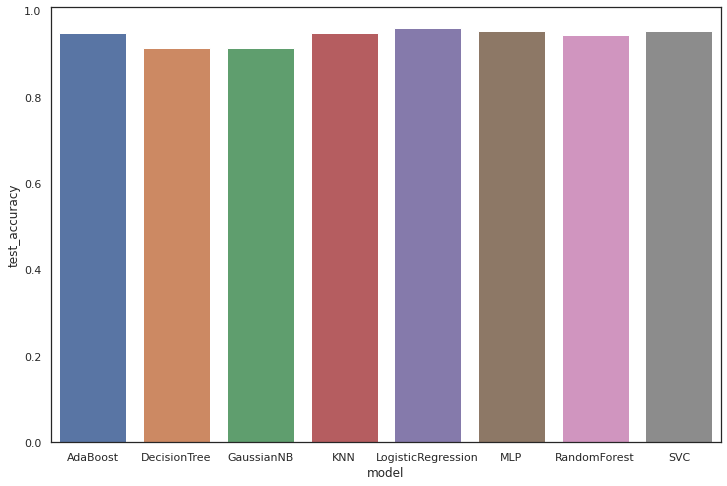

In [9]:
# YOUR CODE HERE
# raise NotImplementedError()

df_test_acc = df_perf.groupby('model')['test_accuracy'].agg('mean')
fig, ax = plt.subplots(1,1, figsize=(12,8))
_ = sns.barplot(x = df_test_acc.index, y= df_test_acc)

__Question 1.4(b)__ A performance model can be measured by various metrics. We can plot all these metrics side-by-side to get an overall picture of the performance of a given model. In the cell after this question, you are provided with a sample code to create a bar plots for comparing the training time and inference time of eight classifcation models. 

Now, write some code to create the following bar graph to compare the `test_accuracy`, `precision`, `recall`, `f1_score` all the classification models.

!['metrics'](https://www.palmetto.clemson.edu/dsci/figures/ps04b_metrics.png)

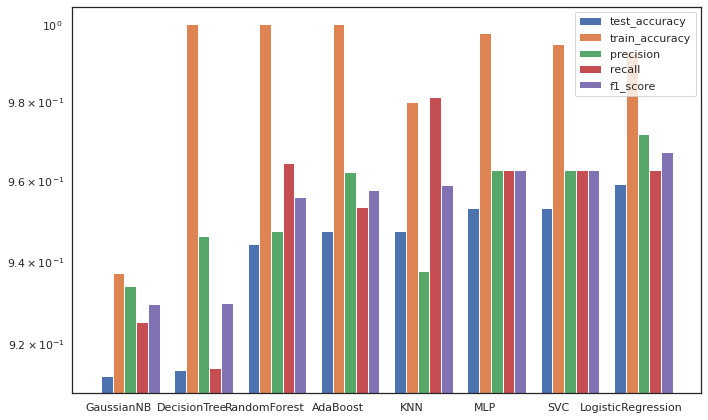

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.set_style("ticks")
# sns.barplot(x = df_perf.index,data= df_perf[perf_columns] ,hue_order = df_perf.columns)
df = df_perf.groupby('model')[perf_columns].agg('mean').sort_values(by='test_accuracy', ascending=True)
df = df.reset_index()

metrics = ['test_accuracy', 'train_accuracy', 'precision', 'recall', 'f1_score']
width = 1.0 / len(metrics) * 0.80
for i, col in enumerate(metrics):
    ax.bar(df.index + i * width, df[col], width)

ax.set_xticks(df.index + width)
ax.set_yscale('log')
_ = ax.set_xticklabels(df['model'])
ax.legend(metrics, loc='best')

fig.tight_layout()
fig.savefig('ps04b_timing.png')

### A sample code to plot a bar graph with two or more variables

```
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.set_style("ticks")
df = df_perf.groupby('model')[perf_columns].agg('mean').sort_values(by='test_accuracy', ascending=True)
df = df.reset_index()

metrics = ['train_time', 'inference_time']
width = 1.0 / len(metrics) * 0.80
for i, col in enumerate(metrics):
    ax.bar(df.index + i * width, df[col], width)

ax.set_xticks(df.index + width)
ax.set_yscale('log')
_ = ax.set_xticklabels(df['model'])
ax.legend(metrics, loc='best')

fig.tight_layout()
fig.savefig('ps04b_timing.png')
```

!['metrics'](https://www.palmetto.clemson.edu/dsci/figures/ps04b_timing.png)

# 2. Confusion Matrix

In classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. 

The following cell trains a LogisticRegression model and constructs a confusion matrix from the test samples.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer(as_frame=True)
features = cancer.data
target = cancer.target.astype('category')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.25, random_state=8)
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

clf = LogisticRegression(fit_intercept=True, max_iter=5000)
_ = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

CM = confusion_matrix(y_test, y_test_pred, labels=target.cat.categories)
print(CM)

[[52  1]
 [ 3 87]]


__question 2.1__ Plot the confusion matrix of the predictions on the test set using the above trained model.

Text(30.5, 0.5, 'True Label')

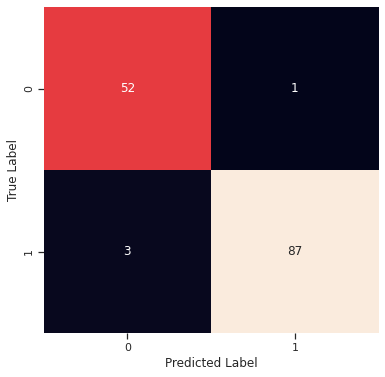

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(CM, annot=True, cbar=False, ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

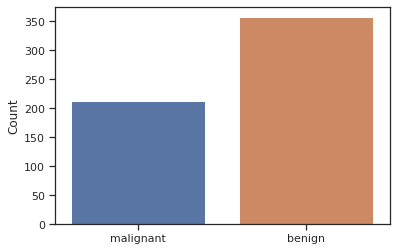

In [13]:
## Show the total counts of each class
c = cancer.target.value_counts()
#sns.barplot(x=cancer.target_names, y=c)
ax = sns.barplot(x=c.index, y=c)
ax.set_xticklabels(cancer.target_names)
ax.set_ylabel('Count')
plt.show()


In sklearn.metrics.confusion_matrix $C$, $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

The terms like 'true negative' and 'true positive' are context-specific. In the breast cancer example, __malignant__ (group __0__) means __positive__ and __benign__ (group __1__) means __negative__.

For better clarification, we use the following plots to show the connections between this terms for the breast cancer prediction problem.

__Question 2.2__ Write some code to extract the true negative, false positive, false negative, and true positive in the test set predictions and save the results to `tn`, `fp`, `fn`, and `tp`.

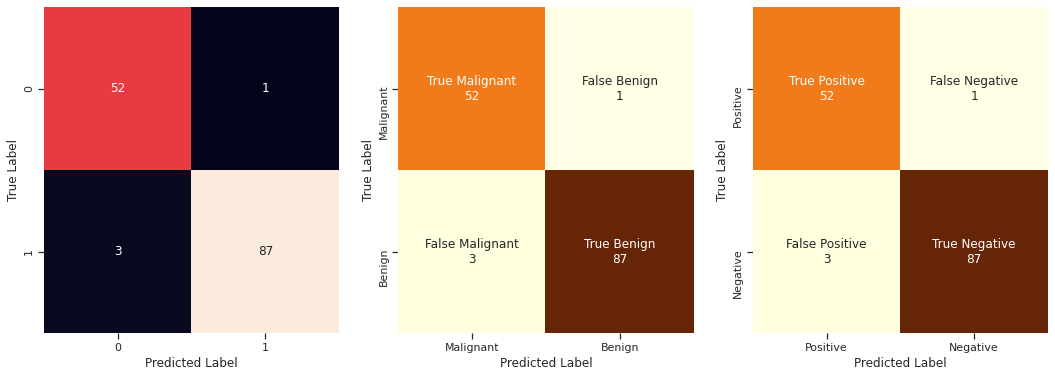

In [14]:
CM = confusion_matrix(y_test, y_test_pred, labels=target.cat.categories)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(CM, annot=True, cbar=False, ax=ax[0])
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

for idx in [1, 2]:
    if idx == 1:
        group_names = ['True Malignant', 'False Benign', 'False Malignant', 'True Benign']
        class_labels = ['Malignant', 'Benign']
    elif idx==2:
        group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative'] 
        class_labels = ['Positive', 'Negative']
        
    group_counts = [f'{value:0.0f}' for value in CM.flatten()]
    labels = [f'{v1}\n{v2}' for v1,v2 in zip(group_names, group_counts)]
    labels = np.array(labels).reshape(2, 2)
    sns.heatmap(CM, annot=labels, fmt='', cmap='YlOrBr', cbar=False, ax=ax[idx])
    ax[idx].set_xlabel('Predicted Label')
    ax[idx].set_ylabel('True Label')
    ax[idx].set_xticks(np.array(range(len(class_labels)))+0.5)
    ax[idx].set_xticklabels(class_labels)
    ax[idx].set_yticks(np.array(range(len(class_labels)))+0.5)
    ax[idx].set_yticklabels(class_labels)

plt.show()

In [15]:
# YOUR CODE HERE
# raise NotImplementedError()
tp= CM[0,0]
tn = CM[1,1]
fn= CM[0,1]
fp = CM[1,0]
print(f'True Negative = {tn:.0f}')
print(f'False Positive = {fp:.0f}')
print(f'False Negative = {fn:.0f}')
print(f'True Positive = {tp:.0f}')

True Negative = 87
False Positive = 3
False Negative = 1
True Positive = 52


In [16]:
assert all(CM.ravel() == [tp, fn, fp, tn])

__Question 2.3__  Write some code to compute the precision, recall, and F1_score from the variables `tn`, `fp`, `fn`, and `tp`, save your results to variables __recall__, __precision__, and __F1__. (Because the difference in how to labeling the classes, it is possible that the precision, recall, and f1 scores are different from those computed from skleran.metrics.)

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
precision = tp/(tp+ fp)
recall = tp/(tp+ fn)
f1 = (2* precision*recall)/(precision+recall)
print(f'Precison = {precision:.4f}')
print(f'Recall = {recall:.4f}')
print(f'F1 = {f1:.4f}')

Precison = 0.9455
Recall = 0.9811
F1 = 0.9630


In [18]:
assert precision == CM[0, 0] / CM[:, 0].sum() 

In [19]:
assert recall == CM[0, 0] / CM[0, :].sum()

In [20]:
assert abs(f1 - 2 * (precision * recall) / (precision + recall)) < 1.0e-5

# 3. Expected Value

When we are applying data science to an actual application like Breast Cancer Prediction, one important principle is to return to the key question: what is the actual goal of the application? what is the true value that an classifier can bring in?

In the above study, the accuracy as a classification metric makes no distinction between false positive and false negative errors. Altough recall and precision provide more specific performance measurement, we still have the question of how to connect the performnace of a classifier to real-world domains.

Expect value provides a key analytical framework for real-world data science problems. Below is a diagram of expected value calculation borrowed from chapter 7 of "Data Science for Business" by Provost and Fawcett.

!['expected value'](https://www.palmetto.clemson.edu/dsci/figures/ps04b_excpected_value.jpg)

In general, the expected value can be calculated by:
$$EV = \sum_{i=1}^{m}P(o_{i}) \cdot V(o_{i})$$

Where, $P(o_{i})$ is ith possible pediction outcome and $V(o_{i})$ is the corresponding value for the ith outcome. The value information is domain specific and needs to be learned separately.

In [21]:
CM = np.array([[52,  1], [ 3, 87]])
VM = np.array([[1000, -20000], [-2000, 10000]])

__Question 3.1__ Given a confusion matrix of a classifier, __CM__, and a cost_benefit_matrix __VM__ shown as above, compute the __expcted value__ of the classifier?

In [22]:
def compute_expected_value(C, V):
    """ computes expected values from a confusion matrix and a cost benefit matrix
    
    Args:
        C (np.ndarray) : a confusion matrix
        V (np.ndarray) : a cost benefit matrix
    
    Returns:
        EV(float) : the expected value
        
    Examples:
        >>> print(compute_expected_value(np.array[[1, 2], [3, 4]], np.array[[1, 1], [1, 1]]))
        
    """
    C = C/np.sum(C)
    return np.sum(C*V)
# YOUR CODE HERE
# raise NotImplementedError()

In [23]:
ev = compute_expected_value(CM, VM)
print(f'Expected Value = ${ev:.2f}')   

Expected Value = $6265.73


In [24]:
assert compute_expected_value(np.array([[1, 2], [3, 4]]), np.array([[1, 1], [1, 1]])) == 1.0

In [25]:
assert compute_expected_value(np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]]), np.array([[1, 1, 0], [1, 1, 0], [1, 0, 1]])) - 0.61111 < 1e-5

__Question 3.2__ Briefly explain why expected value could be a better performance metric than other performance metrics like accuracy or precision?

##  Answer of Q3.2
One reason is that expected value enable users to take the real cost and benefit in practice into account, as in real world when we use machine learning model to solve a business problem, the cost and benefit leaded by the model could be different and the metrics like accuracy , precision, don't consider such real problem. Hence expected value is a better choice to combine the real cost, benefit problem with performance of model.

# 4. Classification Probability

Several classifiers not only can predict the label of an input sample but also can output the probability of belongs to a class. In scitkit-learn, a classifier has method `predict_proba()`. The probabilities for each class will be calculated in a way that depends on the specific model, but they should yield probabilities for each class for each sample you feed into it.

The following code creates the histograms and calibrated probability for four classifiers.

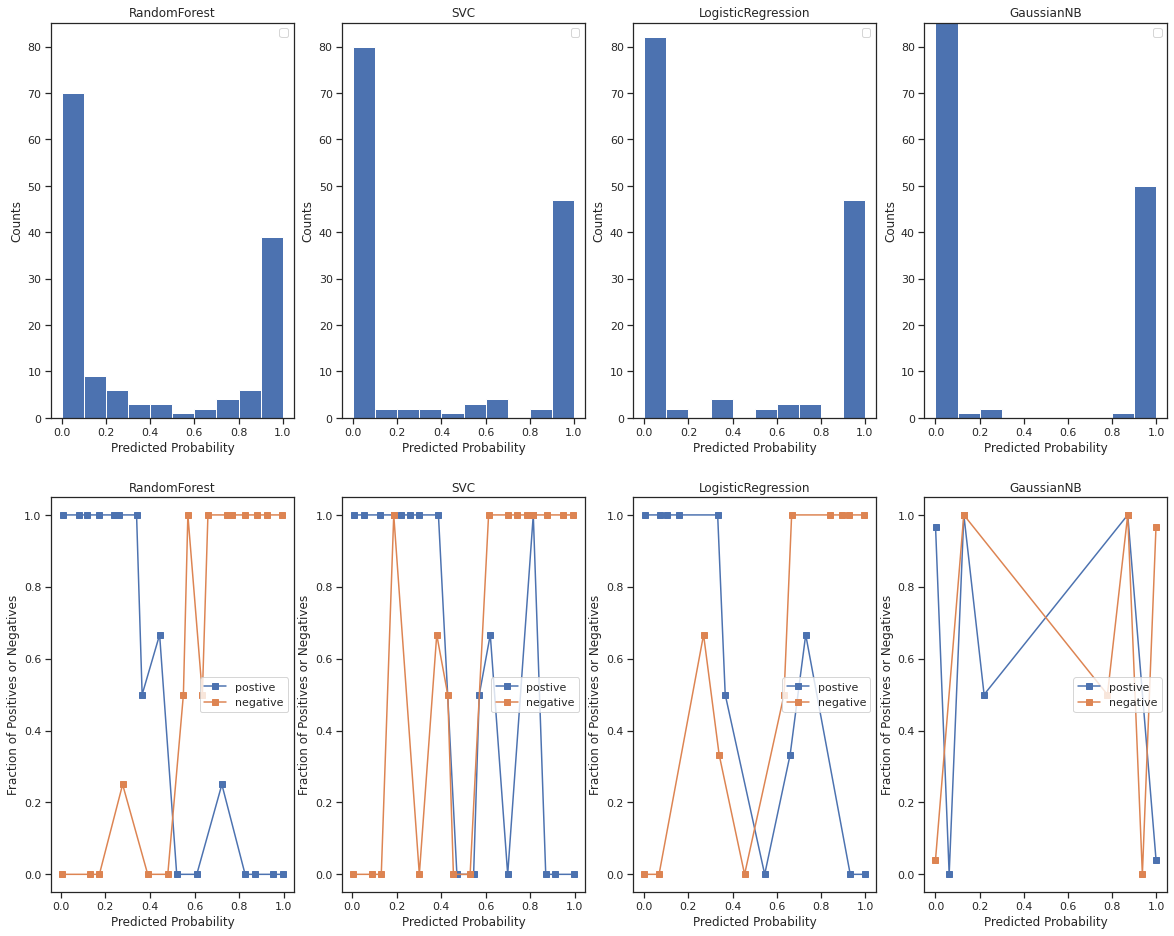

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

cancer = load_breast_cancer(as_frame=True)
features = cancer.data
target = cancer.target.astype('category')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.25, random_state=8)
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(gamma='auto', probability=True),
    'LogisticRegression': LogisticRegression(fit_intercept=True, max_iter=5000),
    'GaussianNB': GaussianNB(),
}

fig, ax = plt.subplots(2, 4, figsize=(20, 16))
idx = 0
n_bins = 10
for model_name, model in models.items():
    clf = model
    _ = clf.fit(X_train, y_train)

    y_test_probability = clf.predict_proba(X_test)
    prob_postive = y_test_probability[:, 0]
    prob_negative = y_test_probability[:, 1]
    
    fraction_of_positives, predicted_positive_prob = calibration_curve(y_test, prob_postive, n_bins=20)
    fraction_of_negative, predicted_nagative_prob = calibration_curve(y_test, prob_negative, n_bins=20)
    
    ax[0, idx].hist(y_test_probability[:, 0], bins=n_bins)
    ax[0, idx].set_title(model_name)
    ax[0, idx].set_ylim(0, 0.2*len(y_train))
    ax[0, idx].set_xlabel('Predicted Probability')
    ax[0, idx].set_ylabel('Counts')
    handles, labels = ax[0, idx].get_legend_handles_labels()
    labels = ['Malignant', 'Benign']
    ax[0, idx].legend(handles, labels)
    
    
    ax[1, idx].plot(predicted_positive_prob, fraction_of_positives, "s-", label="postive")
    ax[1, idx].plot(predicted_nagative_prob, fraction_of_negative, "s-", label="negative")
    ax[1, idx].set_title(model_name)
    ax[1, idx].set_xlabel('Predicted Probability')
    ax[1, idx].set_ylabel('Fraction of Positives or Negatives')
    ax[1, idx].legend(loc='center right')
    idx = idx + 1

__Question 4.1__ Based upon the above plots, which of the following statement is likely to be false?

```
A. For Random Forest, SVC, and LogisticRegression classifiers used in this problem, almost all the test samples with a predicted probability of zero are true positive samples.
B. For Random Forest, SVC, and LogisticRegression classifiers used in this problem, almost all the test samples with a predicted probability of zero are predicted correctly.
C. For Gaussian Naive Bayes Classifier, even a sample has a 100% predicted probability to be positive, it is still likely that the sample is a negtive case.
D. In real-world applications, we can recalculate the classification probability of a given classifier (i.e., setting a threshold of predicted probability for a class) to achieve a desired prediction performance (which can be accuracy, precision, or expected values).
```

In [27]:
# YOUR CODE HERE
# raise NotImplementedError()
answer = 'B'
answer

'B'

__Question 4.2__ Complete the following code to combine the prediction of the four classifiers and then evaluate the accuracy of the combined prediction.

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve
import numpy as np 

cancer = load_breast_cancer(as_frame=True)
features = cancer.data
target = cancer.target.astype('category')

X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.25, random_state=8)
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(gamma='auto', probability=True),
    'LogisticRegression': LogisticRegression(fit_intercept=True, max_iter=5000)
}

    
class CombinedClassifier:
    def __init__(self, models, combine_method='geo_mean'):
        self.models = {
            label: clf for label, clf in models.items()
        }
        self.method=combine_method
    
    def fit(self, X, y):
        for label, clf in self.models.items():
            clf.fit(X, y)
        self.n_classes = np.unique(y).shape[0]
            
    def predict(self, X):
        # YOUR CODE HERE
        # raise NotImplementedError()
        labels_ls = []
        # add prediction of each model to list
        for label, clf in self.models.items():
            y_pred = clf.predict(X)
            labels_ls.append(y_pred.tolist())
        labels_ls = np.array(labels_ls)
        labels = []
        # find the label with most counts as overall prediction
        for i in range(len(labels_ls[0,:])):
            (values,counts) = np.unique(labels_ls[:, i ],return_counts=True)
            ind=np.argmax(counts)
            labels.append(values[ind])

        return labels

    def predict_proba(self, X):
        prob = []
        # add prediction of each model to list
        for label, clf in self.models.items():
            y_pred = clf.predict_proba(X)
            prob.append(y_pred.tolist())
        # find average prediction possibility
        prob = np.array(prob)
        prob = np.mean(prob, axis= 0)
            
# YOUR CODE HERE
# raise NotImplementedError()
        return prob

combined_clf = CombinedClassifier(models)
combined_clf.fit(X_train, y_train)

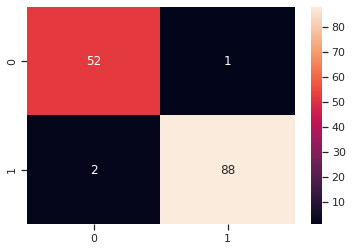

In [29]:
y_test_pred = combined_clf.predict(X_test[:, :])
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)
plt.show()

__Question 4.3__ Complete the following code to find the prediction probability of the test samples with incorrect predictions.

In [30]:
df = pd.DataFrame(combined_clf.predict_proba(X_test), columns=[f'prob_{label}' for label in cancer.target_names])
df['pred_label'] = y_test_pred
df['true_label'] = np.array(y_test)
# YOUR CODE HERE
# raise NotImplementedError()
df[["prob_malignant","prob_benign"]].loc[df['pred_label'] != df['true_label']]

,prob_malignant,prob_benign
66,0.445284,0.554716
68,0.474687,0.525313
83,0.575148,0.424852


__End of Part B__